### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



### Collider 2023, 0.5/0.5

In [2]:
# Define study
STUDY_NAME = "optics_tune_2024"
COLLIDER = "collider_00"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"

In [3]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
#df = df[df["name base collider"] == COLLIDER]

df

name base collider  normalized amplitude in xy-plane  \
beam  qx     qy                                                            
lhcb1 62.305 60.310        collider_00                             4.656   
      62.306 60.311        collider_00                             5.469   
      62.307 60.312        collider_00                             5.625   
      62.308 60.313        collider_00                             5.625   
      62.309 60.314        collider_00                             5.594   
...                                ...                               ...   
      62.325 60.330        collider_26                             3.719   
      62.326 60.331        collider_26                             3.375   
      62.327 60.332        collider_26                             4.000   
      62.328 60.333        collider_26                             2.594   
      62.329 60.334        collider_26                             2.156   

                         qx      qy   dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  qx     qy                                                           
lhcb1 62.305 60.310  62.305  60.310  15.0  15.0       411.0       410.0   
      62.306 60.311  62.306  60.311  15.0  15.0       411.0       410.0   
      62.307 60.312  62.307  60.312  15.0  15.0       411.0       410.0   
      62.308 60.313  62.308  60.313  15.0  15.0       411.0       410.0   
      62.309 60.314  62.309  60.314  15.0  15.0       411.0       410.0   
...                     ...     ...   ...   ...         ...         ...   
      62.325 60.330  62.325  60.330  15.0  15.0       411.0       410.0   
      62.326 60.331  62.326  60.331  15.0  15.0       411.0       410.0   
      62.327 60.332  62.327  60.332  15.0  15.0       411.0       410.0   
      62.328 60.333  62.328  60.333  15.0  15.0       411.0       410.0   
      62.329 60.334  62.329  60.334  15.0  15.0       411.0       410.0   

                     num_particles_per_bunch  
beam  qx     qy                               
lhcb1 62.305 60.310             1.150000e+11  
      62.306 60.311             1.150000e+11  
      62.307 60.312             1.150000e+11  
      62.308 60.313             1.150000e+11  
      62.309 60.314             1.150000e+11  
...                                      ...  
      62.325 60.330             1.150000e+11  
      62.326 60.331             1.150000e+11  
      62.327 60.332             1.150000e+11  
      62.328 60.333             1.150000e+11  
      62.329 60.334             1.150000e+11  

[674 rows x 9 columns]

In [4]:
# Reshape for plotting
df_to_plot = df.pivot(index="name base collider", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.320,62.321,62.322,62.323,62.324,62.325,62.326,62.327,62.328,62.329
name base collider,,,,,,,,,,,,,,,,,,,,,
collider_00,4.656,5.469,5.625,5.625,5.594,5.469,5.594,7.344,7.125,7.000,...,5.219,4.250,3.719,2.906,2.656,2.281,2.000,2.000,2.000,2.000
collider_01,4.188,5.500,5.312,5.344,5.438,5.188,5.156,7.531,7.188,7.062,...,5.219,4.438,3.750,2.750,2.812,2.344,2.000,2.000,2.000,2.000
collider_02,4.500,5.594,5.688,5.344,5.781,5.688,6.562,6.812,6.812,7.312,...,5.469,4.469,3.719,3.094,2.844,2.125,2.000,2.000,2.000,2.000
collider_03,3.906,5.844,5.062,6.000,5.438,5.406,5.875,7.188,7.469,7.188,...,5.281,4.469,3.812,2.969,2.562,2.094,2.000,2.000,2.000,2.000
collider_04,3.562,5.312,5.250,5.594,5.062,5.469,6.094,7.406,7.469,7.312,...,5.531,4.688,3.969,3.281,2.656,2.031,2.000,2.000,2.000,2.000
collider_05,3.812,5.094,5.406,5.188,5.781,5.500,5.656,7.438,7.469,7.406,...,5.469,4.906,3.969,2.969,2.656,2.000,2.000,2.000,2.000,2.000
collider_06,3.812,5.000,5.562,5.688,5.219,5.406,5.500,7.469,7.250,7.594,...,5.469,4.719,3.906,3.406,2.750,2.000,2.000,2.000,2.000,2.000
collider_07,3.938,4.938,5.344,5.312,5.469,5.531,5.750,7.562,7.625,6.969,...,5.281,NaN,3.906,3.250,2.688,2.031,2.000,2.000,2.000,2.000
collider_08,4.062,5.219,5.562,5.250,5.438,5.406,5.531,7.438,7.125,7.688,...,5.344,4.562,3.781,3.094,2.750,2.000,2.000,2.000,2.000,2.000


In [5]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
#conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

FileNotFoundError: [Errno 2] No such file or directory: 'plots/output_optics_tune_2024_collider_00.pdf'

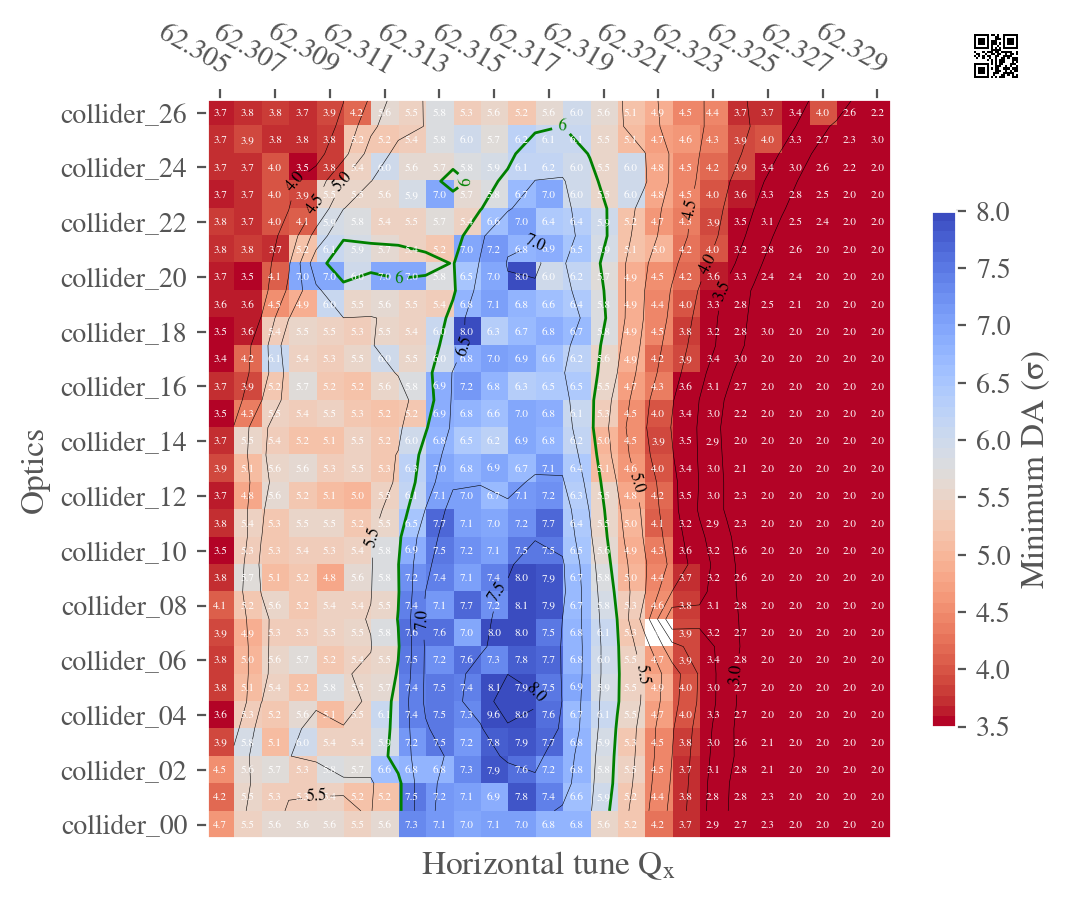

In [6]:
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link="TODO",
    plot_contours=True,
    conf_mad=conf_mad,
    #conf_collider=conf_collider,
    #type_crossing="flatvh",
    #betx=0.485,
    #bety=0.485,
    #Nb = True,
    #CC = False,
    symmetric = False,
    mask_lower_triangle = False,
    ylabel = "Optics",
    plot_diagonal_lines = False,
)